### Access the bucket

In [1]:
# !pip install --upgrade google-cloud-storage

In [2]:
from google.cloud import storage
import json

In [3]:
bucket_name = 'dva-sg-team105'
client = storage.Client.create_anonymous_client()
bucket = client.bucket(bucket_name, user_project=None)
blob = bucket.blob('2021/20210101000000.json')
data = blob.download_as_string()

In [4]:
len(data)

297209

In [ ]:
# pip install geopandas
# pip install rtree==0.9.3

In [5]:
import geopandas as gpd
import matplotlib.pyplot as plt

%matplotlib inline

In [6]:
data_json = json.loads(data)
gdf = gpd.GeoDataFrame.from_features(data_json["features"])

In [7]:
gdf.head()

,geometry,timestamp,taxi_count,api_info
0,"MULTIPOINT (103.63623 1.33558, 103.63771 1.300...",2020-12-31T23:59:40+08:00,2500,{'status': 'healthy'}


In [8]:
blob = bucket.blob('national-map-polygon-geojson.geojson')
country_data = blob.download_as_string()
country_json = json.loads(country_data)
country_gdf = gpd.GeoDataFrame.from_features(country_json)

In [9]:
country_gdf.head()

,geometry,Name,Description
0,"POLYGON Z ((103.95641 1.33136 0.00000, 103.956...",kml_1,<center><table><tr><th colspan='2' align='cent...
1,"POLYGON Z ((103.95745 1.31879 0.00000, 103.957...",kml_2,<center><table><tr><th colspan='2' align='cent...
2,"POLYGON Z ((103.96068 1.32116 0.00000, 103.962...",kml_3,<center><table><tr><th colspan='2' align='cent...
3,"POLYGON Z ((103.96265 1.32080 0.00000, 103.962...",kml_4,<center><table><tr><th colspan='2' align='cent...
4,"POLYGON Z ((103.96283 1.31629 0.00000, 103.963...",kml_5,<center><table><tr><th colspan='2' align='cent...


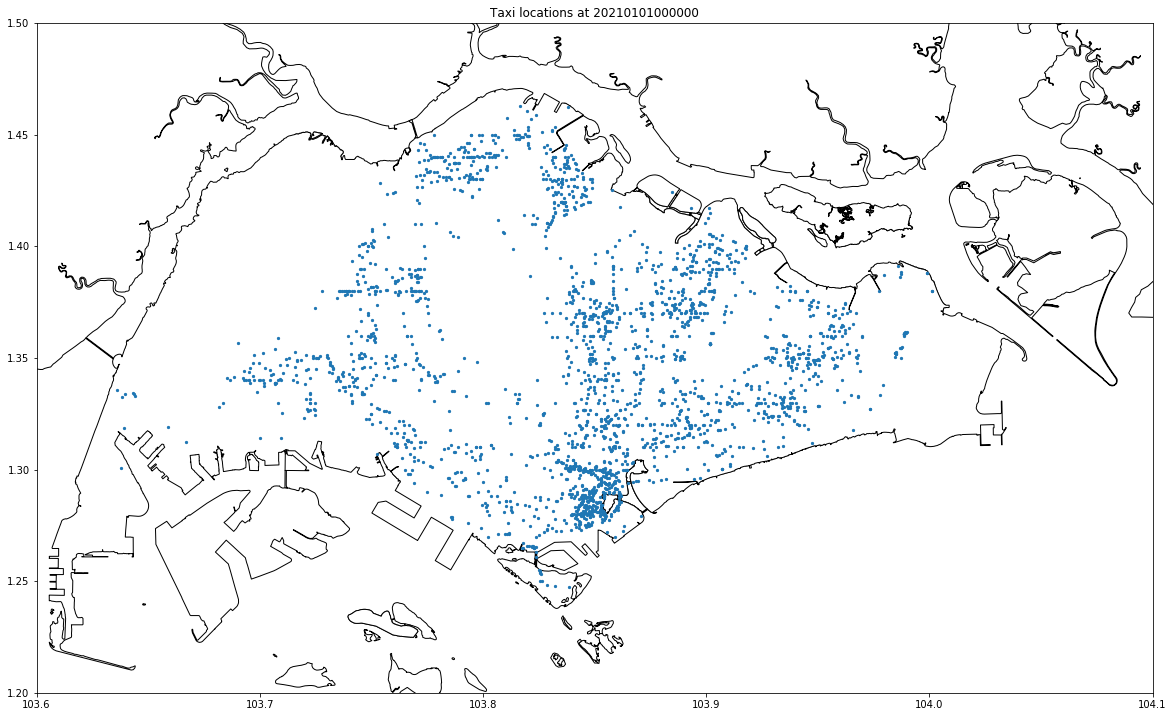

In [10]:
fig, ax = plt.subplots(figsize=(20, 16))
country_gdf['geometry'].plot(ax=ax, color='white', edgecolor='black')
gdf.plot(ax=ax, markersize=5)

ax.set_xlim(103.6, 104.1)
ax.set_ylim(1.2, 1.5)
plt.title('Taxi locations at 20210101000000')
plt.show()